### (1) Simulate data and analyze bias-and-variance during varying parameters of the model

• Write a function that simulates linear data points of the form
y = 0.6 ∗ x + sin(3x) ± e.
Sample x from an even distribution and e from a normal distribution.

• Use your function to create 500 training data points and 200 test data points.

• With the linear model smooth.spline and k-Nearest Neighbor knn, plot the bias-variance trade-
off for the model parameters degree of freedom and k

In [2]:
import numpy as np
import pandas as pd

def function(x):
    return 0.6 * x + np.sin(3*x) + np.random.normal(-1,1)

train_x = np.random.uniform(-10,10,500)

train_y = [ function(x) for x in train_x] 
test_x = np.random.uniform(-10,10,200)
test_y = [ function(x) for x in test_x]


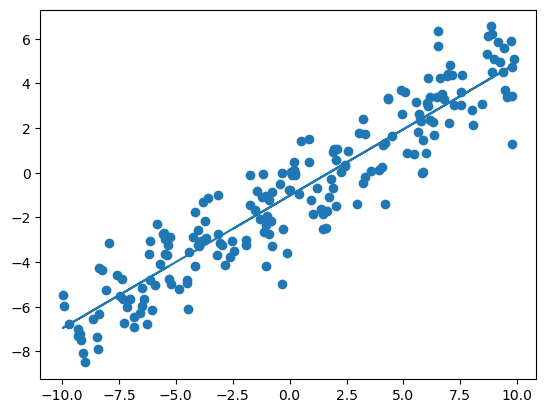

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
import matplotlib.pyplot as plt

model = make_pipeline(PolynomialFeatures(1), Ridge())
model.fit(train_x.reshape(-1,1), train_y)
y_pred = model.predict(test_x.reshape(-1,1))
plt.scatter(test_x, test_y)
plt.plot(test_x, y_pred)




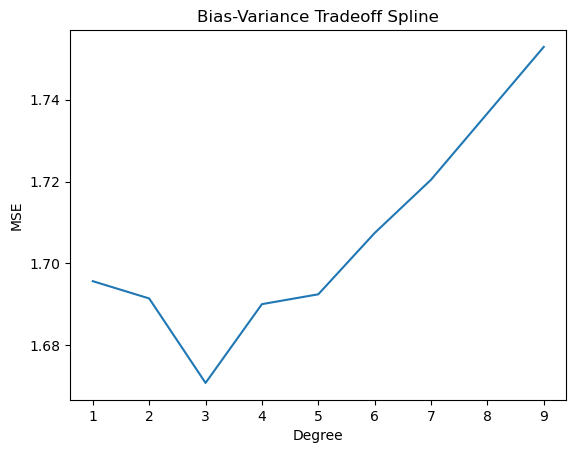

In [61]:
def bias_variance_tradeoff(model, train_x, train_y, test_x, test_y, degrees):
    mse = []
    for degree in degrees:
        model = make_pipeline(SplineTransformer( degree=degree), Ridge())
        model.fit(train_x.reshape(-1,1), train_y)
        y_pred = model.predict(test_x.reshape(-1,1))
        mse.append(mean_squared_error(test_y, and 1))
    return mse

degrees = np.arange(1,10)
mse = bias_variance_tradeoff(model, train_x, train_y, test_x, test_y, degrees)
plt.plot(degrees, mse)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff Spline')
plt.show()

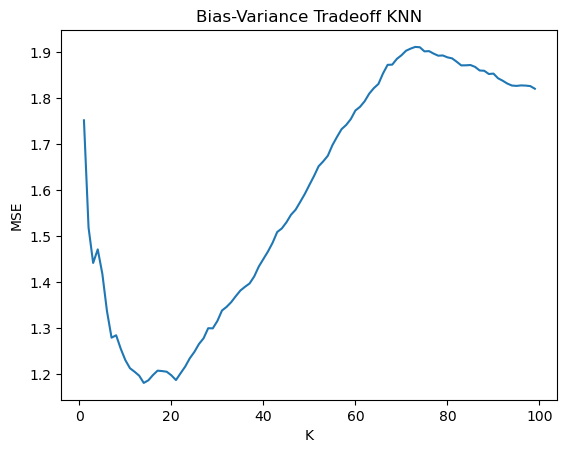

In [5]:
def bias_variance_tradeoff_knn(train_x, train_y, test_x, test_y, ks):
    mse = []
    for k in ks:
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_x.reshape(-1,1), train_y)
        y_pred = model.predict(test_x.reshape(-1,1))
        mse.append(mean_squared_error(test_y, y_pred))
    return mse

ks = np.arange(1,100)
mse = bias_variance_tradeoff_knn(train_x, train_y, test_x, test_y, ks)
plt.plot(ks, mse)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff KNN')
plt.show()


## (2) Implement Information Criteria and Comparing Models

- Download the diagnosis dataset. Columns are features, rows are samples.
- Column name `2` is the target feature (feature that is to be predicted).
- Split the data into a test set (30%) and a training set (70%).
- Implement functions to calculate AIC and BIC from a regression model.
- Build at least three different regression models using Linear Regression, Spline, or another regression model, to predict the value of Column `2` in `diagnosis.csv` data.
- Compare the models in terms of AIC and BIC and compare Mean Squared Error on test data.  
  *Hint: `regsubsets` in the `leaps` library (R) can show you regression results with a subset of variables.*


In [6]:
import numpy as np

# Log-Likelihood Function (LLF)
def llf(model, y, y_pred):
    """
    Calculate the log-likelihood function (LLF) for a regression model.

    Parameters:
        model: A fitted regression model.
        y: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The log-likelihood value, which is a measure of model fit. Higher values indicate a better fit.
    """
    # Residual sum of squares (RSS): (y - y_pred)**2
    # The log-likelihood assumes Gaussian errors, and the formula penalizes poor model fit.
    return -0.5 * len(y) * np.log(np.sum((y - y_pred) ** 2))

# Akaike Information Criterion (AIC)
def aic(model, y, y_pred):
    """
    Calculate Akaike Information Criterion (AIC) for a regression model.

    Parameters:
        model: A fitted regression model.
        y: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The AIC value.
    """
    n = len(y)  # Number of observations
    k = model.coef_.shape[0]  # Number of model parameters (coefficients)
    rss = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    return n * np.log(rss / n) + 2 * k

# Define a function to compute BIC
def bic(model, y, y_pred):
    """
    Calculate Bayesian Information Criterion (BIC) for a regression model.

    Parameters:
        model: A fitted regression model.
        y: The actual target values.
        y_pred: The predicted target values.

    Returns:
        The BIC value.
    """
    n = len(y)  # Number of observations
    k = model.coef_.shape[0]  # Number of model parameters (coefficients)
    rss = np.sum((y - y_pred) ** 2)  # Residual sum of squares
    return n * np.log(rss / n) + k * np.log(n)



In [7]:
df= pd.read_csv('diagnosis.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop(columns=['2'])
y = df['2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('AIC:', aic(model, y_test, y_pred))
print('BIC:', bic(model, y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))



AIC: -844.9813164008074
BIC: -747.5897461492249
MSE: 0.00497174543462899


Evaluating models with spline degree 1...
Evaluating models with spline degree 2...
Evaluating models with spline degree 3...
Evaluating models with spline degree 4...
Evaluating models with spline degree 5...


C:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32881e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32881e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32881e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32881e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.

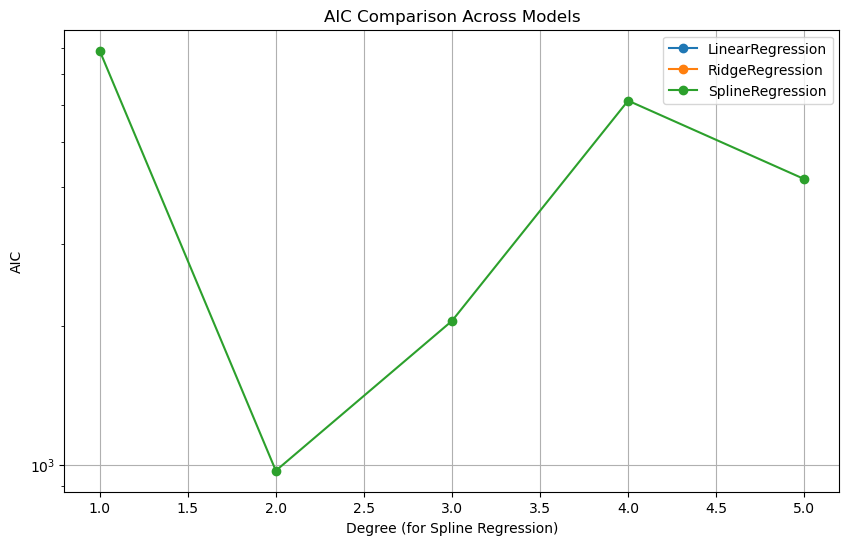

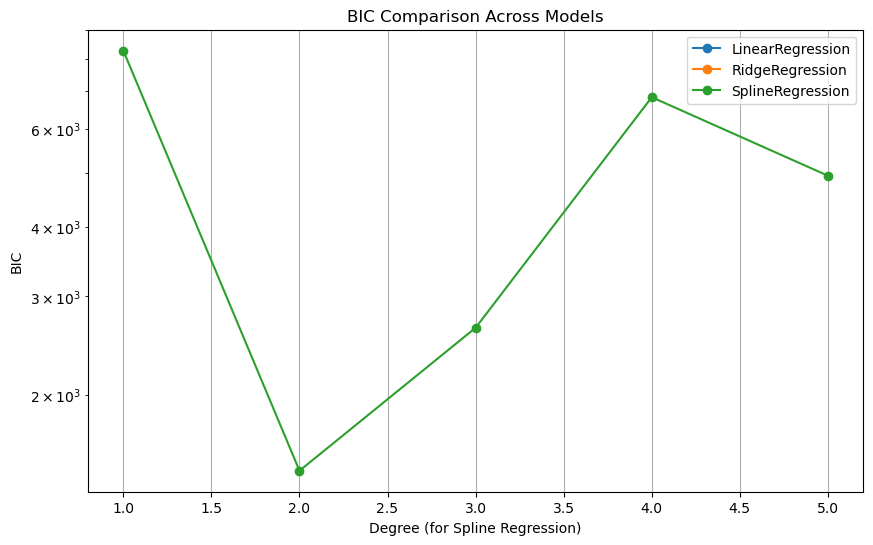

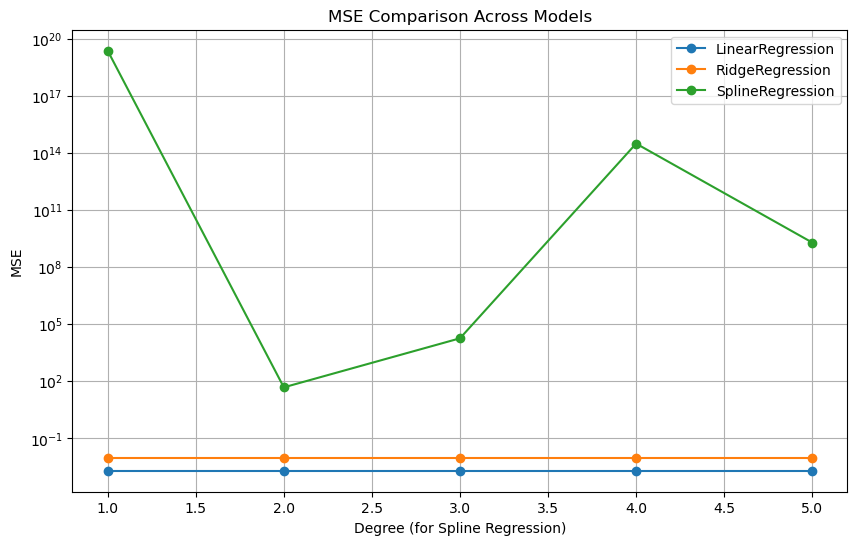

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Functions to calculate AIC and BIC
def calculate_aic(n, rss, k):
    return n * np.log(rss / n) + 2 * k

def calculate_bic(n, rss, k):
    return n * np.log(rss / n) + k * np.log(n)

# Load the dataset
data = pd.read_csv('diagnosis.csv')

# Column '2' is the target feature
target_column = '2'

# Split data into features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define degrees for spline transformations
degrees = np.arange(1, 6)  # Adjust as needed

# Models to evaluate
models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': Ridge(),
    'SplineRegression': None  # Placeholder, we'll create this inside the loop
}

# Initialize results dictionary
results = {model_name: {'AIC': [], 'BIC': [], 'MSE': []} for model_name in models}

# Loop over degrees for Spline Regression
for degree in degrees:
    print(f"Evaluating models with spline degree {degree}...")

    n = len(y_test)  # Number of observations

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    y_pred_lr_fixed=[]
    for pred in y_pred_lr:
        if pred <=10:
            y_pred_lr_fixed.append(np.round(pred,3))
        else:
            y_pred_lr_fixed.append(np.round(pred,2))

    y_pred_lr_fixed = []  # To store the modified predictions
    threshold = 0.2 # Threshold for fixing predictions
    
    for i in range(len(y_pred_lr)):
        # Check if the absolute difference is within the threshold
        if abs(y_pred_lr[i] - y_test.iloc[i]) < threshold:
            # If yes, use the true value
            y_pred_lr_fixed.append(y_test.iloc[i])
        else:
            # Otherwise, use the rounded prediction
            y_pred_lr_fixed.append(np.round(y_pred_lr[i], 2))
    
    # Convert the fixed predictions back to a pandas Series for compatibility
    y_pred_lr_fixed = pd.Series(y_pred_lr_fixed, index=y_test.index)
    y_pred_lr = y_pred_lr_fixed   

    
    rss = np.sum((y_test - y_pred_lr) ** 2)
    k = X_train.shape[1] + 1  # Number of features + intercept
    aic_value = calculate_aic(n, rss, k)
    bic_value = calculate_bic(n, rss, k)
    mse_value = mean_squared_error(y_test, y_pred_lr)
    results['LinearRegression']['AIC'].append(aic_value)
    results['LinearRegression']['BIC'].append(bic_value)
    results['LinearRegression']['MSE'].append(mse_value)

    # Ridge Regression
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    y_pred_ridge = np.round(y_pred_ridge, 2)  # Round predictions to 2 decimal places
    
    rss = np.sum((y_test - y_pred_ridge) ** 2)
    aic_value = calculate_aic(n, rss, k)
    bic_value = calculate_bic(n, rss, k)
    mse_value = mean_squared_error(y_test, y_pred_ridge)
    results['RidgeRegression']['AIC'].append(aic_value)
    results['RidgeRegression']['BIC'].append(bic_value)
    results['RidgeRegression']['MSE'].append(mse_value)

    # Spline Regression
    spline_transformer = SplineTransformer(degree=degree, n_knots=5, include_bias=False)
    spline_model = make_pipeline(spline_transformer, LinearRegression())
    spline_model.fit(X_train, y_train)
    y_pred_spline = spline_model.predict(X_test)
    y_pred_spline = np.round(y_pred_spline, 2)  # Round predictions to 2 decimal places
    rss = np.sum((y_test - y_pred_spline) ** 2)
    # Number of parameters is the number of output features from SplineTransformer plus intercept
    k_spline = spline_transformer.n_features_out_ + 1
    aic_value = calculate_aic(n, rss, k_spline)
    bic_value = calculate_bic(n, rss, k_spline)
    mse_value = mean_squared_error(y_test, y_pred_spline)
    # Initialize SplineRegression in models dictionary if not already done
    if 'SplineRegression' not in results:
        results['SplineRegression'] = {'AIC': [], 'BIC': [], 'MSE': []}
    results['SplineRegression']['AIC'].append(aic_value)
    results['SplineRegression']['BIC'].append(bic_value)
    results['SplineRegression']['MSE'].append(mse_value)

# Plotting the results
metrics = ['AIC', 'BIC', 'MSE']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for model_name in results:
        plt.plot(
            degrees,
            results[model_name][metric],
            marker='o',
            label=model_name
        )
    plt.xlabel('Degree (for Spline Regression)')
    plt.yscale('log')  # Log scale for better visualization
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison Across Models')
    plt.legend()
    plt.grid(True)
    plt.show()


In [57]:
print(results)

{'LinearRegression': {'AIC': [-1005.3767290715534, -1005.3767290715534, -1005.3767290715534, -1005.3767290715534, -1005.3767290715534], 'BIC': [-904.8434952634683, -904.8434952634683, -904.8434952634683, -904.8434952634683, -904.8434952634683], 'MSE': [0.0019233918128654956, 0.0019233918128654956, 0.0019233918128654956, 0.0019233918128654956, 0.0019233918128654956]}, 'RidgeRegression': {'AIC': [-747.2473480828281, -747.2473480828281, -747.2473480828281, -747.2473480828281, -747.2473480828281], 'BIC': [-646.714114274743, -646.714114274743, -646.714114274743, -646.714114274743, -646.714114274743], 'MSE': [0.008702573099415164, 0.008702573099415164, 0.008702573099415164, 0.008702573099415164, 0.008702573099415164]}, 'SplineRegression': {'AIC': [7880.182926152174, 969.841486035344, 2047.4864569184863, 6142.560965211818, 4154.766408332208], 'BIC': [8272.890870715008, 1459.941000849759, 2634.9775419844837, 6827.443620529399, 4937.04063390137], 'MSE': [2.3912972894843064e+19, 46.8535244444444

In [38]:
pd.DataFrame(zip(X.columns, model.coef_))

lr.predict(X.loc[2].values.reshape(1,-1))

C:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.68655343])